In [41]:
import pandas as pd
import pynbody 
import numpy as np 
import tangos

import sys
sys.path.insert(0, '../util/')
from util import util

import matplotlib.pyplot as plt

### Quantities to obtain for each galaxy
* w20 (our HI profile)
* Mbar (pynbody)
* Mstar (pynbody)
* MHI (pynbody)
* SFR (tangos?)
* SFR/MHI (can try SFE but may not be accurate for dwarfs) (pynbody)
* $\langle \Sigma_{SFR} \rangle$
* $\langle \Sigma_{HI} \rangle$ 
* $\langle \Sigma_{baryon} \rangle$

Also, spearman rank correlation coefficient for each pair 

In [2]:
f = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096'

In [5]:
s = pynbody.load(f)
s.physical_units()
h = s.halos()[1]

In [8]:
h.all_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho',
 'igasorder',
 'HI',
 'HeI',
 'FeMassFrac',
 'eps',
 'den',
 'vel',
 'phi',
 'FeMassFracdot',
 'pos',
 'HeII',
 'massform',
 'amiga.g

In [74]:
Mstar = h.s['mass'].sum()
Mhi = h.g['mass'] / 1.36
Mbar = Mstar + h.g['mass']

$\Sigma_{SFR} = (8.1\times 10^{-2}I_{FUV} + 3.2 \times 10^{-3}I_{24}) \cos i$

In [25]:
len(s['pos'])

25953621

In [28]:
len(h.g['v_disp'])

2777645

In [29]:
len(h.g['pos'])

2777645

In [62]:
len(h.g['HII'])

2777645

In [63]:
len(h.g['HI'])

2777645

In [73]:
h.star

<SimSnap "/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096:halo_1::star" len=2292934>

In [52]:
tsim = tangos.all_simulations()[0]
tstep = tsim.timesteps[-6]

In [54]:
th = tstep.halos[430]

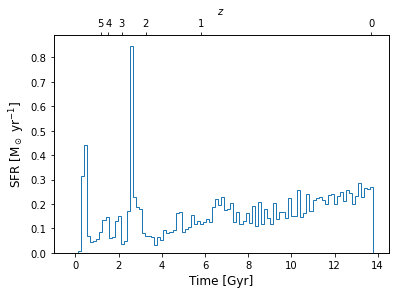

In [58]:
sfhcdm1 = pynbody.plot.stars.sfh(s)

In [59]:
sfhcdm1

(SimArray([9.32925832e-05, 0.00000000e+00, 0.00000000e+00, 9.20100417e-03,
           3.13036323e-01, 4.39488351e-01, 6.88755363e-02, 4.37659919e-02,
           4.87107262e-02, 5.64812757e-02, 8.36603194e-02, 1.33224979e-01,
           1.47374928e-01, 6.02338575e-02, 6.56008497e-02, 1.31980032e-01,
           1.48687214e-01, 3.67463492e-02, 4.90486994e-02, 1.71831831e-01,
           8.48051250e-01, 2.26580948e-01, 1.86193317e-01, 1.80682048e-01,
           8.12792554e-02, 6.93594888e-02, 6.90002292e-02, 6.58497214e-02,
           3.23367789e-02, 6.62516430e-02, 5.30137233e-02, 9.13545415e-02,
           8.24608058e-02, 8.56054649e-02, 9.50031877e-02, 1.63573593e-01,
           1.68716788e-01, 8.67518634e-02, 9.85393673e-02, 1.04508899e-01,
           1.53603986e-01, 1.17860653e-01, 1.31783709e-01, 1.17677748e-01,
           1.26307234e-01, 1.38303146e-01, 1.25425115e-01, 1.87745124e-01,
           2.21638680e-01, 1.95117489e-01, 2.28963554e-01, 1.76886946e-01,
           1.78404123e-01